# Iteration 1

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [187]:
df = pd.read_csv('set15_it1.csv')

In [189]:
df

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,sqft
1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,sqft
2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,sqft
3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,sqft
4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,sqft
...,...,...,...,...,...,...,...
2358,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,sqft
2359,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,sqft
2360,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,sqft
2361,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,sqft


## Data Understanding

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DI              2363 non-null   int64  
 1   TradeValue      2363 non-null   float64
 2   RealmType       2363 non-null   object 
 3   Enclave         2363 non-null   object 
 4   LivingQuarters  2245 non-null   float64
 5   ParcelSize      2363 non-null   float64
 6   ParcelSizeUnit  2363 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 129.4+ KB


In [194]:
df.describe()

,DI,TradeValue,LivingQuarters,ParcelSize
count,2363.000000,2363.000000,2245.000000,2363.000000
mean,1169.813796,181150.568007,1157.071715,9889.801684
std,675.447687,82165.603916,392.780821,7954.890245
min,0.000000,61.500000,256.000000,-19378.000000
25%,584.500000,129825.000000,871.000000,7243.000000
50%,1170.000000,160000.000000,1116.000000,9320.000000
75%,1753.500000,213000.000000,1341.000000,11475.000000
max,2339.000000,755000.000000,4339.000000,164660.000000


### Boxplots

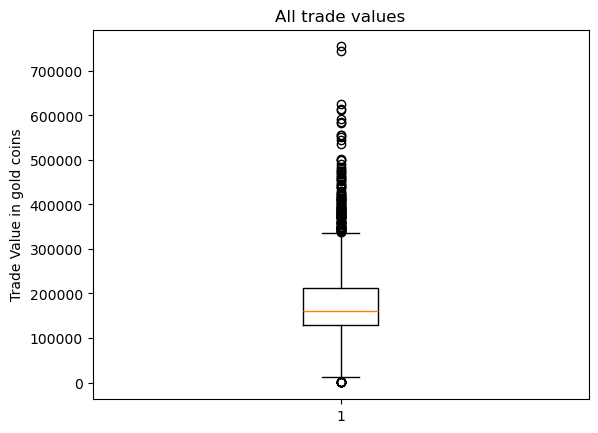

In [197]:
plt.boxplot(x=df['TradeValue'].dropna())
plt.title('All trade values')
plt.ylabel('Trade Value in gold coins')
plt.show()

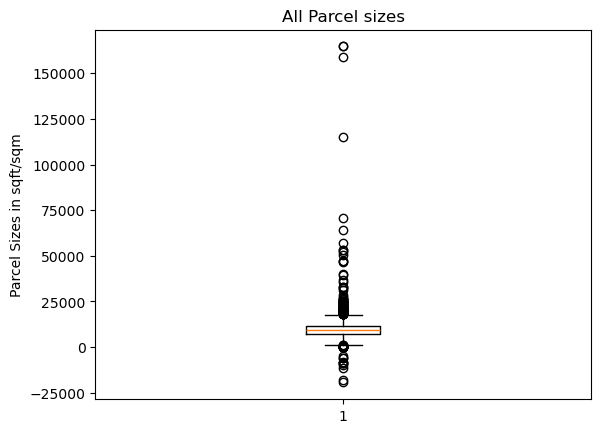

In [198]:
plt.boxplot(x=df['ParcelSize'].dropna())
plt.title('All Parcel sizes')
plt.ylabel('Parcel Sizes in sqft/sqm')
plt.show()

### Histogram

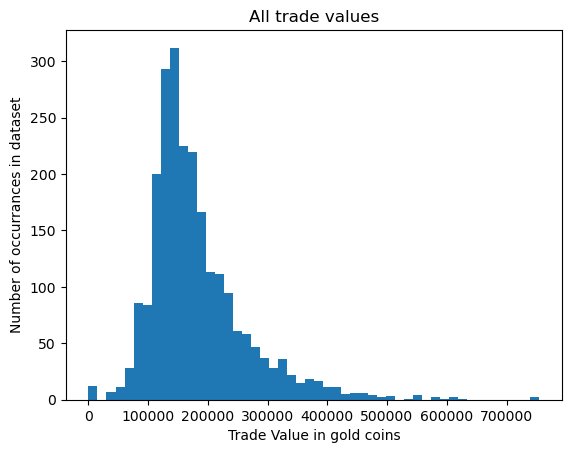

In [202]:
plt.hist(df["TradeValue"], bins=50)
plt.title('All trade values')
plt.xlabel('Trade Value in gold coins')
plt.ylabel('Number of occurrances in dataset')
plt.show()

In [203]:
df.sample(30)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
1311,1299,325000.0,GnomeBurough,Petalbridge,2134.0,13500.0,sqft
375,373,158450.0,Meadowlands,Emberfall,1116.0,11235.0,sqft
24,24,217000.0,Meadowlands,Sunspire,1348.0,12352.0,sqft
869,861,280000.0,Meadowlands,Windwhisper,1179.0,70761.0,sqft
1806,1788,345000.0,Meadowlands,Silverglen,1787.0,11924.0,sqft
135,134,128500.0,Meadowlands,Dragonspire,732.0,8300.0,sqft
712,704,152500.0,Meadowlands,Crystalhollow,892.0,17979.0,sqft
479,476,176000.0,Meadowlands,Nighthaven,1521.0,9900.0,sqft
1418,1405,135000.0,GnomeBurough,Petalbridge,903.0,9000.0,sqft
1545,1530,81000.0,GnomeBurough,Wolfsbane,484.0,1890.0,sqft


### Checking for data quality issues within the dataset

Below we are checking for cells with the value NAN (not a number)

In [208]:
df.isna().sum()

DI                  0
TradeValue          0
RealmType           0
Enclave             0
LivingQuarters    118
ParcelSize          0
ParcelSizeUnit      0
dtype: int64

Checking for potential duplicates or spelling issues within the realm types or enclaves. As you can see in the enclaves there are quite a few duplicates.

In [211]:
df['RealmType'].unique()

array(['Meadowlands', 'GnomeBurough', 'AetherIsles', 'ArcaneMarket',
       'CitadelQuarter'], dtype=object)

In [213]:
df['RealmType'].value_counts()

RealmType
Meadowlands       1838
GnomeBurough       376
AetherIsles        111
ArcaneMarket        19
CitadelQuarter      19
Name: count, dtype: int64

In [215]:
df['Enclave'].unique()

array(['Dragonspire', 'Petalbridge', 'Shadowmere', 'Emberfall',
       'Mystvale', 'Nighthaven', 'Crystalhollow', 'Brightforge',
       'Wyverncliff', 'Riverbend', 'Starfall', 'Duskwood', 'Sunspire',
       'Silverglen', 'Stormwatch', 'Wolfsbane', 'Thornfield',
       'Ravenstone', 'Stormhold', 'Dreamweaver', 'Glimmerwood',
       'Wolfsbanes', 'Windwhisper', 'Mossheart', 'Moonglade',
       'Oakenshade', 'Verdantia', 'DUSKWOOD', 'Crystalhollows',
       'cloudrest', 'DRAGONSPIRE', 'dreamweaver', 'Cloudrest',
       'SHADOWMERE', 'sunspire', 'dragonspire', 'WYVERNCLIFF',
       'PETALBRIDGE', 'Duskwoods', 'windwhisper', 'Brightforges',
       'RAVENSTONE', 'silverglen', 'SILVERGLEN', 'petalbridge',
       'Shadowmeres', 'crystalhollow'], dtype=object)

In [217]:
df['Enclave'].value_counts()

Enclave
Dragonspire       351
Sunspire          214
Petalbridge       190
Shadowmere        156
Wyverncliff       146
Silverglen        132
Duskwood          132
Emberfall         119
Nighthaven        103
Brightforge       100
Stormwatch         90
Crystalhollow      89
Thornfield         83
Mystvale           72
Ravenstone         58
Glimmerwood        55
Riverbend          44
Stormhold          40
Windwhisper        37
Wolfsbane          29
Starfall           25
Dreamweaver        21
Mossheart          19
Cloudrest          17
Oakenshade          9
Verdantia           6
dragonspire         2
dreamweaver         2
sunspire            2
Moonglade           2
Brightforges        2
Duskwoods           1
Shadowmeres         1
petalbridge         1
SILVERGLEN          1
silverglen          1
RAVENSTONE          1
windwhisper         1
Wolfsbanes          1
PETALBRIDGE         1
WYVERNCLIFF         1
SHADOWMERE          1
DRAGONSPIRE         1
cloudrest           1
Crystalhollows      1
DU

Here we are checking if the parcel size unit is consistent

In [220]:
df['ParcelSizeUnit'].unique()

array(['sqft', 'sqm'], dtype=object)

Checking for duplicated values

In [223]:
df.duplicated().sum()

23

In [225]:
df['TradeValue'].sort_values().head(30)

496        61.5
1240       99.5
1002      127.0
184       129.5
1270      140.0
688       140.2
623       174.0
1636      215.0
147       227.0
1126      255.5
1184      610.0
2226    12789.0
156     34900.0
16      35311.0
851     37900.0
475     39300.0
871     40000.0
488     44000.0
1348    45000.0
1168    46500.0
1890    50138.0
1996    51689.0
1282    52000.0
1499    52500.0
110     55000.0
1226    55993.0
699     58500.0
763     59000.0
2066    60000.0
1820    60000.0
Name: TradeValue, dtype: float64

In [227]:
dfm = df.loc[df['ParcelSizeUnit'] == 'sqm']

In [229]:
dfft = df.loc[df['ParcelSizeUnit'] == 'sqft']

In [231]:
dfm['LivingQuarters'].mean()

1154.8095238095239

In [233]:
dfft['LivingQuarters'].mean()

1157.0930755395684

In [235]:
dfm['ParcelSize'].mean()

995.5808620869564

In [237]:
dfft['ParcelSize'].mean()

9977.22351211111

In [239]:
dfm['TradeValue'].mean()

192136.13043478262

In [241]:
dfft['TradeValue'].mean()

181042.59025641024

## Data preparation

First flipping the sign on all the negative sized parcels

In [245]:
df["ParcelSize"] = df["ParcelSize"].abs()

In [247]:
df.describe()

,DI,TradeValue,LivingQuarters,ParcelSize
count,2363.000000,2363.000000,2245.000000,2363.000000
mean,1169.813796,181150.568007,1157.071715,9982.670918
std,675.447687,82165.603916,392.780821,7837.981638
min,0.000000,61.500000,256.000000,0.043300
25%,584.500000,129825.000000,871.000000,7298.500000
50%,1170.000000,160000.000000,1116.000000,9345.000000
75%,1753.500000,213000.000000,1341.000000,11485.500000
max,2339.000000,755000.000000,4339.000000,164660.000000


In [249]:
df.sort_values(by=["ParcelSize"]).head(50)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
1240,1229,99.5,GnomeBurough,Mystvale,1011.0,0.043300,sqft
688,680,140.2,Meadowlands,Stormwatch,1213.0,0.064350,sqft
496,493,61.5,Meadowlands,Shadowmere,NaN,0.068820,sqft
1270,1259,140.0,GnomeBurough,Petalbridge,719.0,0.072000,sqft
147,146,227.0,Meadowlands,Nighthaven,1280.0,0.084000,sqft
1002,993,127.0,Meadowlands,Shadowmere,1177.0,0.093500,sqft
184,183,129.5,GnomeBurough,Petalbridge,1583.0,0.096000,sqft
1126,1116,255.5,Meadowlands,Silverglen,1320.0,0.111460,sqft
1636,1620,215.0,Meadowlands,Crystalhollow,1508.0,0.122090,sqft
623,616,174.0,Meadowlands,Duskwood,1141.0,0.125890,sqft


For the initial sqft ones, multiply the tradevalue and parcelsize by 1000, keep the rest the same
For the sqm ones after that, their size to value ratio would make sense if they were converted to sqft
From there on I think it's fine

In [272]:
df['ParcelSize'] = df.apply(lambda x: x['ParcelSize'] * 10.7639 if x['ParcelSizeUnit'] == 'sqm' else x['ParcelSize'], axis=1)

In [288]:
df.replace(to_replace='sqm', value='sqft', inplace=True)

On my end, I don't think any of the TradeValues after the above fixing will be exactly unrealistic and think they
should all be kept the same, though removing the bottom and top percentile is just as fair

In [152]:
df = df[df['TradeValue'] < 700000]

In [154]:
df.describe()

,DI,TradeValue,LivingQuarters,ParcelSize
count,2361.000000,2361.000000,2243.000000,2361.000000
mean,1170.072003,180668.696400,1155.088720,9975.388978
std,675.643771,80513.513071,387.291918,7836.832031
min,0.000000,61.500000,256.000000,0.043300
25%,584.000000,129800.000000,870.500000,7296.000000
50%,1171.000000,160000.000000,1115.000000,9340.000000
75%,1754.000000,213000.000000,1339.500000,11478.000000
max,2339.000000,625000.000000,4339.000000,164660.000000


Here, fix the enclave name typos

In [159]:
df["Enclave"] = df["Enclave"].str.lower()

C:\Users\Eigenaar\AppData\Local\Temp\ipykernel_8564\2910308930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Enclave"] = df["Enclave"].str.lower()


In [161]:
df["Enclave"] = df["Enclave"].str.title()

C:\Users\Eigenaar\AppData\Local\Temp\ipykernel_8564\3562705285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Enclave"] = df["Enclave"].str.title()


In [163]:
df['Enclave'] = df['Enclave'].str.rstrip('s')

C:\Users\Eigenaar\AppData\Local\Temp\ipykernel_8564\967876523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Enclave'] = df['Enclave'].str.rstrip('s')


In [165]:
df['Enclave'].sort_values().unique()

array(['Brightforge', 'Cloudrest', 'Crystalhollow', 'Dragonspire',
       'Dreamweaver', 'Duskwood', 'Emberfall', 'Glimmerwood', 'Moonglade',
       'Mossheart', 'Mystvale', 'Nighthaven', 'Oakenshade', 'Petalbridge',
       'Ravenstone', 'Riverbend', 'Shadowmere', 'Silverglen', 'Starfall',
       'Stormhold', 'Stormwatch', 'Sunspire', 'Thornfield', 'Verdantia',
       'Windwhisper', 'Wolfsbane', 'Wyverncliff'], dtype=object)

Here, all the duplicated

In [168]:
df = df.drop_duplicates()

In [170]:
df.duplicated().sum()

0

And here, all the NaNs. For that, I think the best move is to make them something around the median instead of
fully ditching them, assuming all their other values make logical sense
Here's a check for that, even

In [173]:
df.loc[df['LivingQuarters'].isna()].sample(30)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
866,858,260000.0,Meadowlands,Wyverncliff,NaN,8847.000000,sqft
88,87,167000.0,Meadowlands,Duskwood,NaN,9734.000000,sqft
517,513,147000.0,Meadowlands,Wyverncliff,NaN,9986.000000,sqft
709,701,196000.0,Meadowlands,Silverglen,NaN,5381.000000,sqft
1652,1636,173000.0,Meadowlands,Windwhisper,NaN,15263.000000,sqft
554,548,68400.0,ArcaneMarket,Mystvale,NaN,7500.000000,sqft
469,466,155000.0,Meadowlands,Dragonspire,NaN,10170.000000,sqft
1613,1597,202500.0,Meadowlands,Nighthaven,NaN,14145.000000,sqft
447,444,130000.0,Meadowlands,Crystalhollow,NaN,6953.000000,sqft
742,734,315000.0,Meadowlands,Thornfield,NaN,18044.000000,sqft


I'd say they all look fine, doesn't seem to exist any correlation with the other columns, so now onto taking care of them